In [55]:
import numpy as np
import pandas as pd

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

import matplotlib.pyplot as plt

In [24]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [5]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

### Regression

In [27]:
# Load the features data
feat = pd.read_csv('features.csv',index_col=0, parse_dates=True, infer_datetime_format=True)

# Load the Target data
CS = pd.read_csv('CS.csv',index_col=0, parse_dates=True, infer_datetime_format=True)


In [29]:
# Set the correct shape for CS data (quarterly and set the right data vs the features data)
CS = pd.read_csv('CS.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
CS = CS.resample('Q').last()
CS = CS.iloc[:-1]
CS.shape

(137, 1)

In [30]:
# Set the correct shape for features data (same duration compared to CS data)
feat = pd.read_csv('features.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
feat = feat.loc[CS.index[0]:CS.index[-1]]
feat.shape

(137, 9)

In [45]:
X = feat.diff().dropna()
y = CS.diff().dropna()

### Regression

In [54]:
np.sqrt(np.mean((y - np.mean(y)) ** 2))

Case-Shiller U.S. National Home Price Index    2.847859
dtype: float64

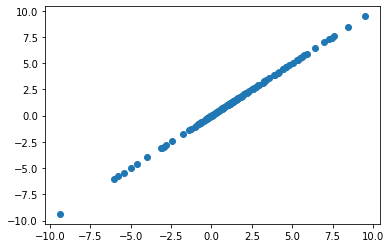

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [67]:
# Set XGB model

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42, min_child_weight=5)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

[20:59:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
2.4132443013259253


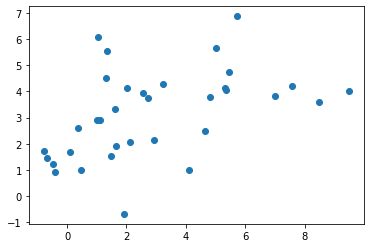

In [68]:
plt.scatter(y_test,y_pred)

In [69]:
np.sqrt(np.mean((y_test - np.mean(y_train)) ** 2))

Case-Shiller U.S. National Home Price Index    3.431633
dtype: float64

In [74]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

0.1878944015010684

In [ ]:
# Make predictions - this is the predictions for CS-Index
pred_new = model.predict(X_new)
pred_new = pred_new.reshape(-1)
pred_new

In [ ]:
# Interpretation >> sqrt(mse) is very low, which implies the distance between the model & actual values is very small. Regression model is good. 

# Back testing

In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline
import json

### Binary classification

In [79]:
# Change negative by 0, postive by 1 of y value 

y_bin = np.sign(y)
y_bin

,Case-Shiller U.S. National Home Price Index
1987-06-30,1.0
1987-09-30,1.0
1987-12-31,1.0
1988-03-31,1.0
1988-06-30,1.0
...,...
2020-03-31,1.0
2020-06-30,1.0
2020-09-30,1.0
2020-12-31,1.0


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_bin_train, y_bin_test = train_test_split(X, y_bin, shuffle=False)

In [83]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_bin_train)

y_bin_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_bin_test, y_bin_pred))

# not able to classify this type of data (JC - error) 

[21:10:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 0  4]
 [ 0 30]]


/Users/jcmignon/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jcmignon/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Multiclass classification


In [38]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

# not able to classify this type of data (JC - error) 

/Users/jcmignon/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jcmignon/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[20:04:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: continuous is not supported

### Cross validation
_Cross-validation using KFold_

In [39]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:linear")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

#TO DO - problem with display_scores function

# JC - I would say print(np.sqrt(scores))

KeyError: "None of [Int64Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,\n            ...\n            124, 126, 127, 128, 129, 130, 131, 134, 135, 136],\n           dtype='int64', length=109)] are in the [columns]"

### Cross-validation using cross_val_score

In [11]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

scores = cross_val_score(xgb_model, X, y, scoring="neg_mean_squared_error", cv=5)

display_scores(np.sqrt(-scores))

[15:27:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09

### Interpretation
_Interpretation - what does the score, Mean, Std means?_

### Hyperparameter searching


In [40]:
xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: -1.187 (std: 2.098)
Parameters: {'colsample_bytree': 0.7658531575242875, 'gamma': 0.48727363259943496, 'learning_rate': 0.26392763243640927, 'max_depth': 2, 'n_estimators': 109, 'subsample': 0.8263106479866242}



### Early stopping
The number of boosted trees (n_estimators) to train is uncapped, rather training continues until validation has not improved in n rounds

In [41]:
# if more than one evaluation metric are given the last one is used for early stopping
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred)


/Users/jcmignon/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jcmignon/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: y contains previously unseen labels: [69.324, 75.14, 75.846, 76.422, 76.499, 76.577, 76.79, 78.117, 78.20100000000001, 80.081, 81.67, 86.315, 90.199, 99.551, 110.393, 129.309, 135.871, 137.075, 139.628, 140.16899999999998, 147.969, 149.795, 150.516, 156.439, 166.22400000000002, 166.53900000000002, 167.905, 175.06799999999998, 175.15099999999998, 182.75, 195.903, 204.099, 211.98, 215.271, 219.901]

xgb_model.fit() will produce a model from the last iteration, not the best one, so to get the optimum model consider retraining over xgb_model.best_iteration rounds

In [42]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

AttributeError: 'XGBClassifier' object has no attribute 'best_score'

### Evaluations


In [43]:

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)


ValueError: y contains previously unseen labels: [69.324, 75.14, 75.846, 76.422, 76.499, 76.577, 76.79, 78.117, 78.20100000000001, 80.081, 81.67, 86.315, 90.199, 99.551, 110.393, 129.309, 135.871, 137.075, 139.628, 140.16899999999998, 147.969, 149.795, 150.516, 156.439, 166.22400000000002, 166.53900000000002, 167.905, 175.06799999999998, 175.15099999999998, 182.75, 195.903, 204.099, 211.98, 215.271, 219.901]

# Plotting

In [44]:
# requires graphviz and python-graphviz conda packages
import graphviz

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

ValueError: y contains previously unseen labels: [69.324, 75.14, 75.846, 76.422, 76.499, 76.577, 76.79, 78.117, 78.20100000000001, 80.081, 81.67, 86.315, 90.199, 99.551, 110.393, 129.309, 135.871, 137.075, 139.628, 140.16899999999998, 147.969, 149.795, 150.516, 156.439, 166.22400000000002, 166.53900000000002, 167.905, 175.06799999999998, 175.15099999999998, 182.75, 195.903, 204.099, 211.98, 215.271, 219.901]